# Importing Libaries

In [217]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import itertools

# Reading Data from input

In [218]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [219]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [220]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

**Data Preprocessing**

Every dataset was clear, there is no null value at all and no duplicated and no categorial data.

In [222]:
df.isnull().sum()
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [223]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [224]:
df = df.drop_duplicates()

**VISTUATLIZATION**

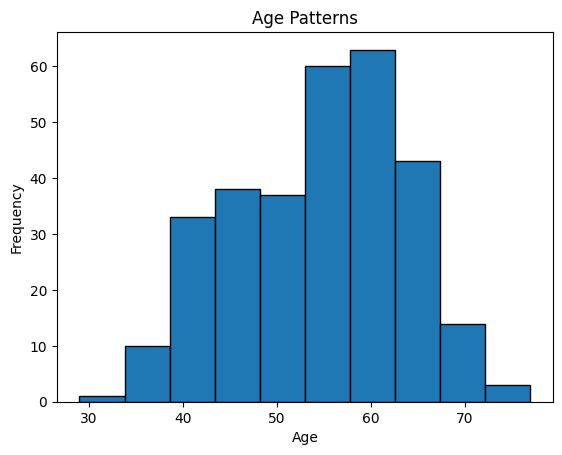

In [225]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Patterns')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

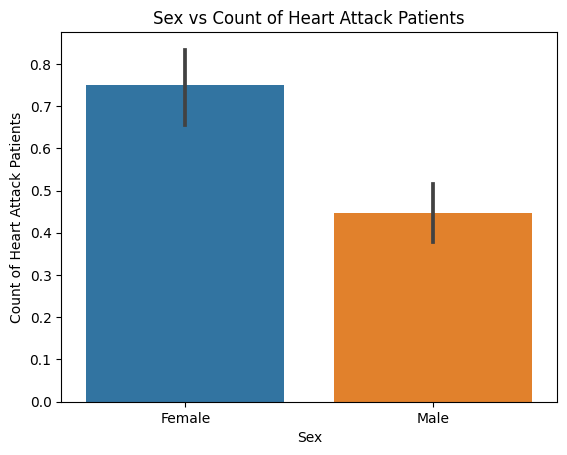

In [226]:
# Sex vs Heart Attack
ax = sns.barplot(x = 'sex',y = 'output',data = df)
ax.set(xlabel='Sex', ylabel='Count of Heart Attack Patients', title='Sex vs Count of Heart Attack Patients')
ax.set_xticklabels(['Female', 'Male'])
plt.show()

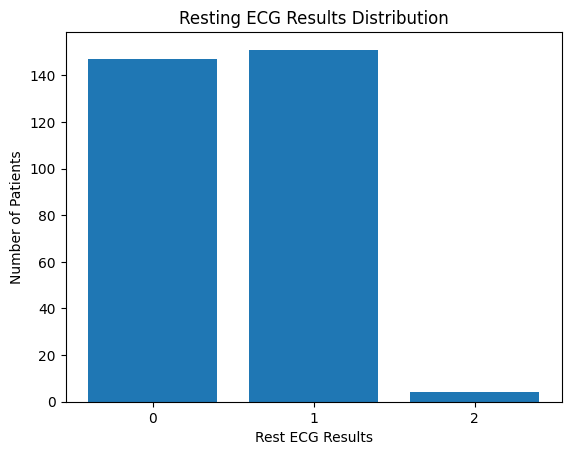

In [227]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

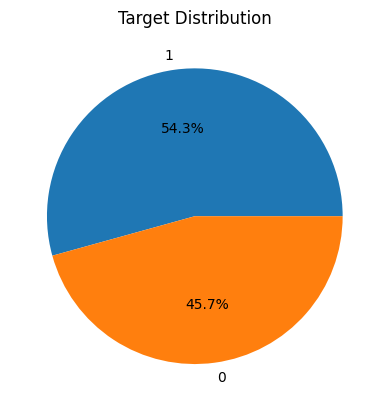

In [228]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

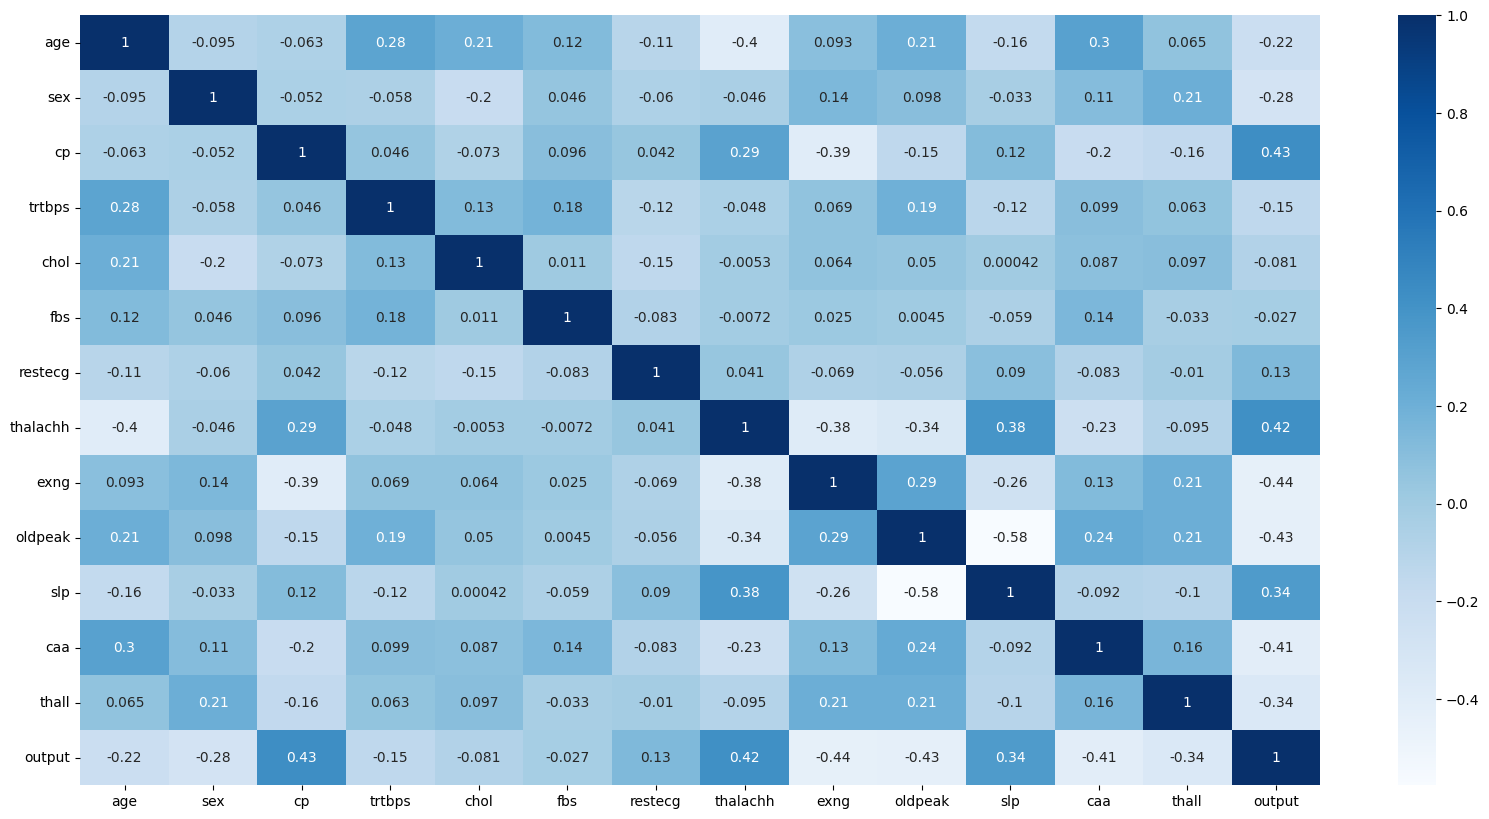

In [229]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

# Modelling

**Spliting the data**

In [230]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [231]:
cont_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
st_scaler = StandardScaler()
X_norm=df.copy()
X_norm[cont_cols]=pd.DataFrame(st_scaler.fit_transform(X_norm[cont_cols]), columns=[cont_cols])
X_norm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [232]:
df_full_train, df_test = train_test_split(X_norm, test_size=0.2, random_state=56)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=56)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.output.values
y_val = df_val.output.values
y_test = df_test.output.values

del df_train['output']
del df_val['output']
del df_test['output']

**After normalize, some data field are null at train data set**

In [233]:
df_train = df_train.fillna(0)
df_train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

In [234]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_acc = round(accuracy_score(y_train, train_preds),4)*100
    test_acc = round(accuracy_score(y_test, test_preds),4)*100
    return train_acc, test_acc, test_preds

In [235]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Checking for best parameters (LR)**

In [236]:
train_results = []
test_results = []
for rand in range(1,80,14):
    model = LogisticRegression(random_state=rand, solver='lbfgs', max_iter=5000)
    train_acc, test_acc, y_pred = evaluate_model(model, df_train, y_train, df_val, y_val)
    re_train = (train_acc,rand)
    re_test = (test_acc,rand)
    train_results.append(re_train)
    test_results.append(re_test)
print(train_results,test_results)

[(91.11, 1), (91.11, 15), (91.11, 29), (91.11, 43), (91.11, 57), (91.11, 71)] [(83.61, 1), (83.61, 15), (83.61, 29), (83.61, 43), (83.61, 57), (83.61, 71)]


**Checking for best parameters (DecisionTreeClassifier)**

In [237]:
test_results = []
for d in [3,4,5]:
    for s in [2,1]:  
        for rand in range(1,80,14):
            dt = DecisionTreeClassifier(random_state=rand,max_depth=d,min_samples_leaf=s)
            train_acc, test_acc, y_pred = evaluate_model(dt, df_train, y_train, df_val, y_val)
            re_test = (test_acc,d,s,rand)
            test_results.append(re_test)
scores = pd.DataFrame(test_results, columns=["auc","depth","min_leaf","rand"])
scores.sort_values(by="auc",ascending=False)


,auc,depth,min_leaf,rand
16,75.41,4,2,57
28,75.41,5,2,57
25,75.41,5,2,15
15,75.41,4,2,43
14,75.41,4,2,29
12,75.41,4,2,1
17,73.77,4,2,71
27,73.77,5,2,43
26,73.77,5,2,29
13,73.77,4,2,15


**Checking parameter for RandomForestClassifier**

In [238]:
test_results = []
for d in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=5,min_samples_leaf=d ,random_state=1)
        train_acc, test_acc, y_pred = evaluate_model(rf, df_train, y_train, df_val, y_val)
        re_test = (test_acc,n,d)
        test_results.append(re_test)
scores = pd.DataFrame(test_results, columns=["auc","estimators","sample"])
scores.sort_values(by="auc",ascending=False)

,auc,estimators,sample
44,85.25,50,5
45,85.25,60,5
43,83.61,40,5
4,83.61,50,1
5,83.61,60,1
...,...,...,...
85,72.13,60,50
84,72.13,50,50
81,72.13,20,50
80,72.13,10,50


In [239]:
models = [('LR', LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000)),
           ('CART', DecisionTreeClassifier(random_state=43,max_depth=5,min_samples_leaf=2)),
          ('RF', RandomForestClassifier(n_estimators=10,random_state=43,max_depth=5,min_samples_leaf=3,n_jobs=-1)),
          ('XGB', XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=25))]

**Training All Models**

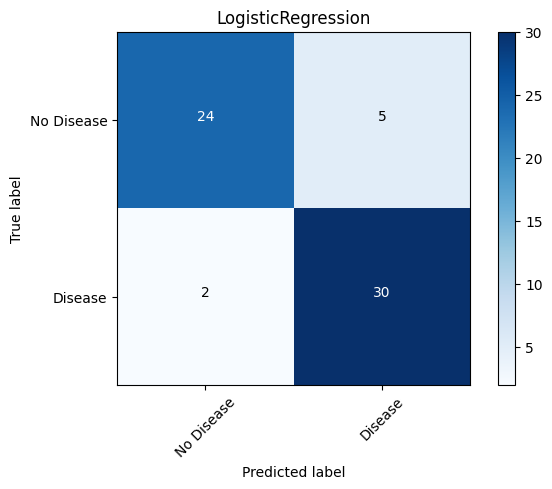

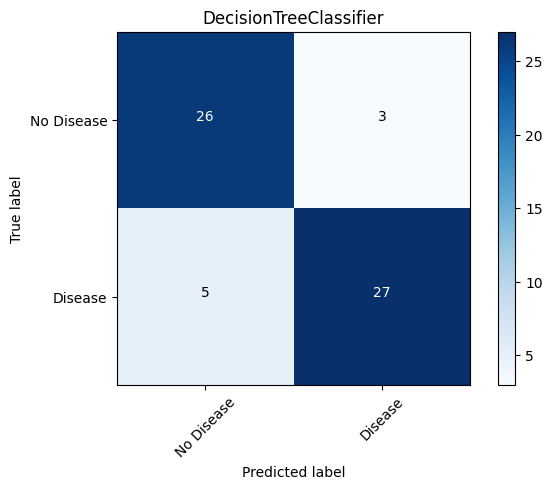

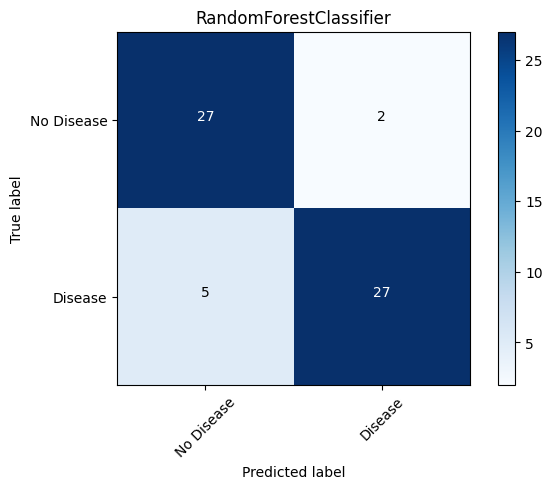

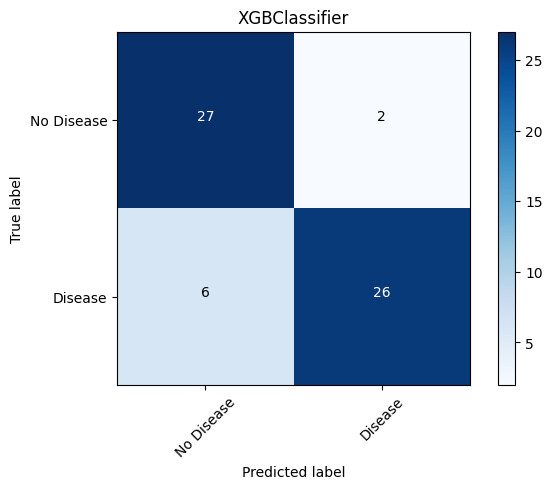

,model,train_accuracy,test_accuracy
0,LR,91.11,88.52
1,CART,95.00,86.89
2,RF,93.33,88.52
3,XGB,94.44,86.89


In [240]:
train_results = []
test_results = []

for name, model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, df_train, y_train, df_test, y_test)
    re_test = (name,train_acc,test_acc)
    train_results.append(train_acc)
    test_results.append(re_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
    plt.show()

scores = pd.DataFrame(test_results, columns=["model","train_accuracy","test_accuracy"])
# scores.sort_values(by="auc",ascending=False)
scores

# Chosing the best

**Based on the result, both LR and RF are almost the same,**

In [241]:
def train(X,y):
    model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000)
    model = model.fit(X, y)
    return model

In [242]:
def normalization(customer):
    customer_df = pd.DataFrame([customer])
    cont_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
    st_scaler = StandardScaler()
    X_norm=customer_df
    X_norm[cont_cols]=pd.DataFrame(st_scaler.fit_transform(X_norm[cont_cols]), columns=[cont_cols])
    return X_norm

In [243]:
def predict(model,X):
    y_pred = model.predict(X)
    return y_pred

In [244]:
y_test.shape

(61,)

In [245]:
model = train(df_train,y_train)
y_pred = predict(model,df_test)
auc = roc_auc_score(y_test,y_pred)
auc

0.8825431034482758

In [246]:
print(y_test == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
 False]


# Saving Model

In [247]:
import pickle

In [248]:
output_file = f'model.bin'
f_out = open(output_file,"wb")
pickle.dump(model,f_out)
f_out.close()

# Load model and test with data

In [249]:
with open("model.bin", 'rb') as f_in:
    model = pickle.load(f_in)

In [250]:
customer = {
    "age": 63,
    "sex": 1,
    "cp": 3,
    "trtbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 0,
    "thalachh": 150,
    "exng": 0,
    "oldpeak": 2.3,
    "slp": 0,
    "caa": 0,
    "thall": 1
}

In [251]:
cts = normalization(customer)

In [252]:
pred = model.predict(cts)[0]
pred

1